# 1-EDA(Analyse exploratoire )

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

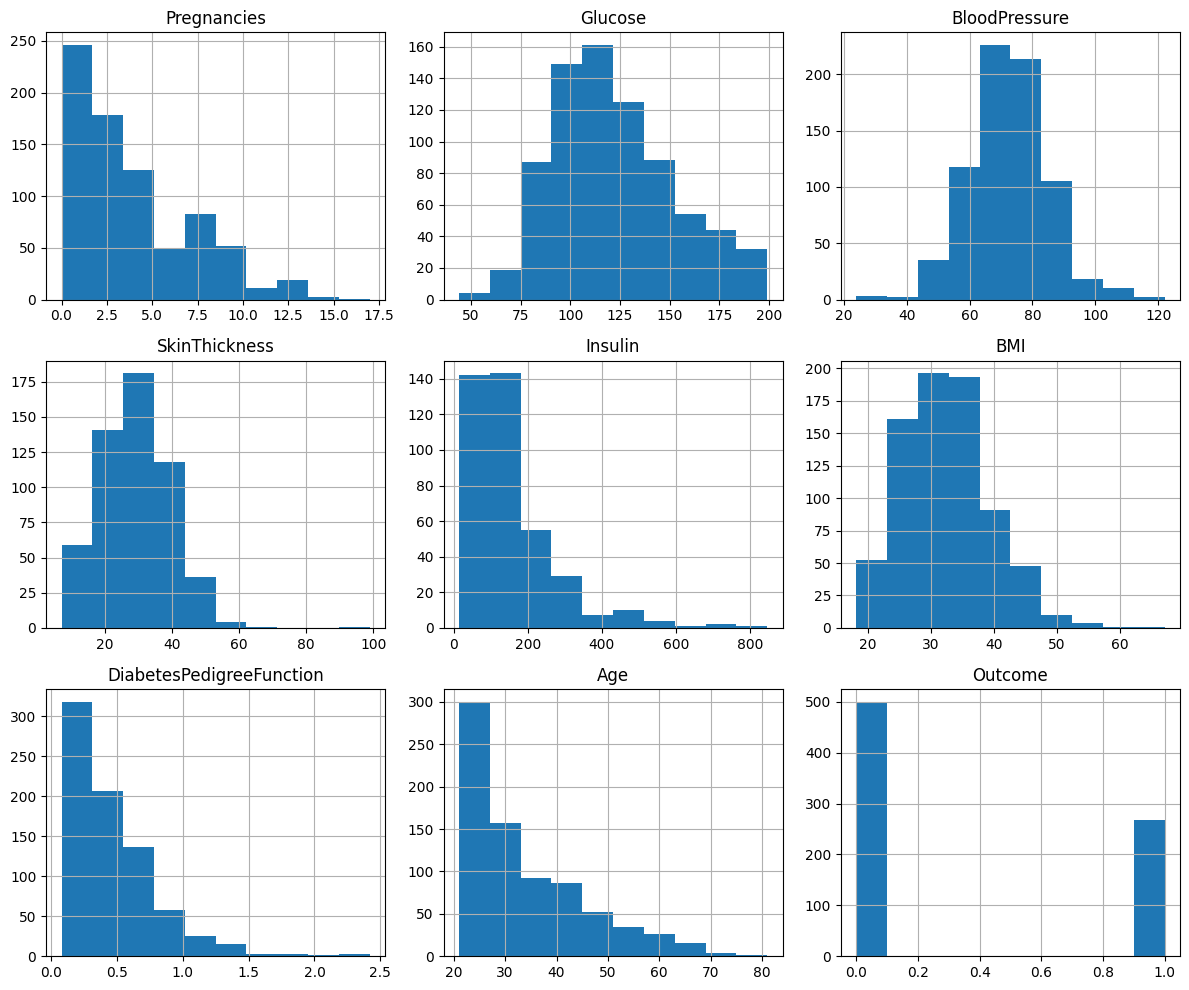

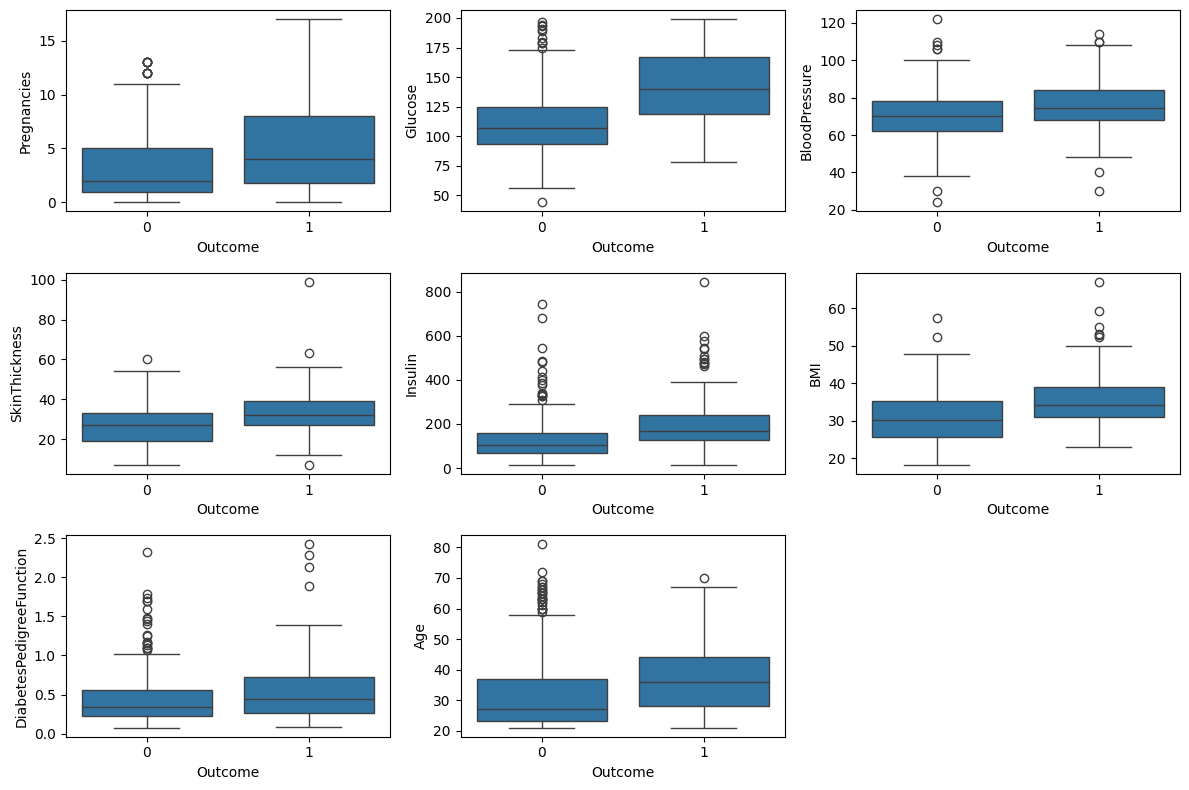

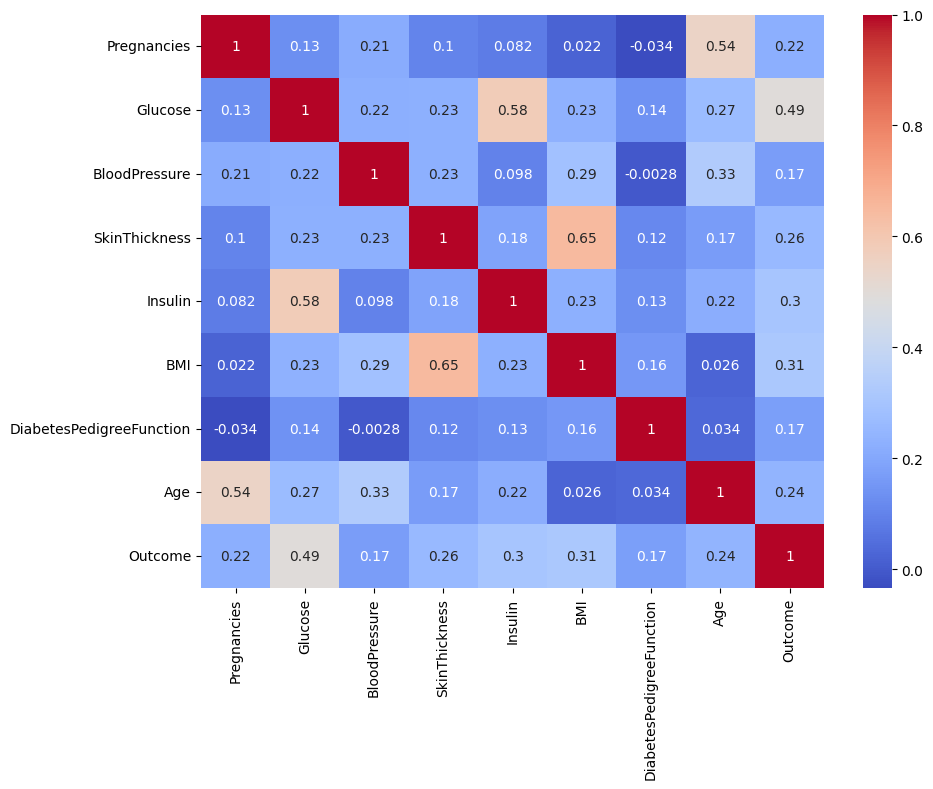

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Chargement des données
df = pd.read_csv("diabetes.csv")

# Aperçu général
print(df.head())
print(df.info())
print(df.describe())

# Vérifier la distribution de la cible
print(df['Outcome'].value_counts(normalize=True))

# 2. Remplacement des 0 impossibles par NaN (glucose, pression, épaisseur, insuline, BMI)
cols_zero_to_nan = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for c in cols_zero_to_nan:
    df[c] = df[c].replace(0, np.nan)

print(df[cols_zero_to_nan].isna().mean())
# 4. Sauvegarde du dataset final nettoyé
df.to_csv("save_final.csv", index=False)


# 3. Visualisation de base

# Histogrammes des features
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

# Boxplots par rapport à la cible
plt.figure(figsize=(12, 8))
for i, col in enumerate(df.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, x="Outcome", y=col)
plt.tight_layout()
plt.show()

# Matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.tight_layout()
plt.show()




## 1️ Distribution de la variable cible (Outcome)

* La classe **Outcome = 0** (non diabétique) est majoritaire.
* Il y a donc un **déséquilibre modéré des classes**.

---

## 2️ Histogrammes : forme des distributions

###  Pregnancies

* Distribution **asymétrique à droite**.
* Beaucoup de femmes avec peu de grossesses, quelques valeurs élevées.
* Valeur informative mais avec une forte dispersion.

###  Glucose

* Distribution assez proche d’une cloche, mais **décalée vers des valeurs élevées**.
* C’est l’une des variables les plus structurées visuellement.
  👉 Bon candidat comme **feature clé**.

###  BloodPressure

* Distribution relativement normale.
* Moins discriminante visuellement.

###  SkinThickness & Insulin

* Distributions très asymétriques.
* Beaucoup de valeurs basses et **quelques valeurs extrêmes (outliers)**.
   Variables bruitées, sensibles au prétraitement (imputation, scaling).

###  BMI

* Distribution proche d’une normale, centrée autour de 30.
* Indique une population majoritairement en surpoids.

###  DiabetesPedigreeFunction

* Forte asymétrie à droite.
* Majorité de petites valeurs, quelques très grandes.
*Peut capter un **effet génétique**, mais pas linéaire.

###  Age

* Asymétrie à droite.
* Beaucoup de jeunes adultes, moins de personnes âgées.

---

## 3️ Boxplots vs Outcome : pouvoir discriminant


### Variables qui **différencient clairement diabétiques / non diabétiques** :

* **Glucose** 

  * Médiane nettement plus élevée pour Outcome = 1.
  * Séparation visuelle très claire.
  * Variable la plus discriminante.

* **BMI**

  * Médiane plus élevée chez les diabétiques.
  * Différence cohérente mais modérée.

* **Insulin**

  * Médiane plus haute pour Outcome = 1.
  * Beaucoup d’outliers, mais signal présent.

* **SkinThickness**

  * Légèrement plus élevé chez les diabétiques.

* **Age**

  * Les diabétiques sont en moyenne plus âgés.

### Variables moins discriminantes :

* **BloodPressure**

  * Boîtes très proches entre les deux classes.

* **DiabetesPedigreeFunction**

  * Différence légère mais bruitée.

---

## 4️ Matrice de corrélation : relations linéaires

###  Corrélations fortes entre features

* **SkinThickness ↔ BMI (~0.65)**
* **Glucose ↔ Insulin (~0.58)**
  - Variables redondantes possibles.

###  Corrélation avec la cible (Outcome)

Les features les plus corrélées avec l'Outcome :

1. **Glucose (~0.49)** 
2. **BMI (~0.31)**
3. **Insulin (~0.30)**
4. **SkinThickness (~0.26)**
5. **Age (~0.24)**

 -Aucune corrélation extrême, ce qui suggère :

* Relation **multifactorielle**
* Modèles non linéaires potentiellement efficaces (Random Forest, XGBoost)

---

##  Problème des zéros on les a remplacés par NaN

-à retenir :

* Il faudra **imputer** ces valeurs (médiane, KNN, modèle).
* Ne surtout pas les laisser telles quelles avant l’entraînement.

---

##  Conclusion 

 L’analyse exploratoire montre que le diabète est principalement associé à des niveaux élevés de glucose, d’IMC, d’insuline, ainsi qu’à l’âge. Certaines variables présentent des distributions asymétriques et de nombreux outliers, nécessitant un prétraitement adapté. Les corrélations indiquent une dépendance multifactorielle du diabète, suggérant l’intérêt de modèles capables de capturer des relations non linéaires.

---


